<a href="https://colab.research.google.com/github/igooruh/analise-dados-airbnb/blob/main/Analisando_Dados_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Cidade do México*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do México, e ver quais insights podem ser extraídos a partir de dados brutos.** (*Lembrando que dataset é uma versão resumida*)

## Obtenção dos Dados

O [Airbnb](https://www.airbnb.com.br) disponibiliza dados das principais cidades do mundo para que os mesmos possam utilizados para realização de insights. Sendo assim o conjunto de dados utilizado neste projeto de análise exploratória foi obtido na plataforma [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Será baixado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Mexico City (good for visualisations).*

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um Dataframe
df = pd.read_csv('http://data.insideairbnb.com/mexico/df/mexico-city/2020-12-23/visualisations/listings.csv')

## Análise de Dados

Objetivo: Conhecer mais sobre o dataset, permitindo assim ter o entendimento de como está estruturado o conjunto de dados.

**Dicionário das Variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - nome do bairro por grupo
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Mas antes de inciarmos a análise, vamos verificar como está o *dataset*, analisando as 5 primeiras entradas.

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,4019,1,0,NaN,NaN,1,364
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Entire home/apt,8286,1,49,2020-10-25,0.44,10,364
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43778,-99.15549,Entire home/apt,650,4,60,2019-07-24,1.59,2,0
3,58955,Entire beautiful duplex in la Roma,282620,Laura,NaN,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1447,15,42,2020-01-31,0.38,1,0
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.41259,-99.17959,Private room,1206,2,52,2019-11-03,1.36,2,0


## Questão 1: Quantos atributos(variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos dos atributos?

Este dataframe é uma versão "resumida" do Airbnb, o mesmo possui **19852 entradas** e **16 variáveis**. Porém na plataforma há uma versão mais completa com **35847 entradas** e **106 variáveis**.

In [4]:
# Identificar o volume de dados do DataFrame
print('Entrada:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entrada:	 19852
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Questão 2: Qual a porcentagem de valores ausentes no dataset?

Os dados ausentes de um dataset está diretamente relacionada com a qualidade do mesmo, sendo assim um dataset tiver muitos dados ausentes em diferentes variáveis pode comprometer a análise dos dados. Por isso é impotante entender desde o início quais são os valores nulos e se são significativos comparados ao total de entradas.

* Notamos que ao ver a coluna `neigbourhood_group` que possui 100% dos valores faltantes. Sendo podemos tomar a decisão de remover a coluna para mantermos nosso dataframe limpo.

* As variáveis `reviews_per_mounth` e `last_review` possuem 26% dos valores nulos.

* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.263701
last_review                       0.263701
name                              0.000252
host_name                         0.000050
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Limpeza de dados

Nessa fase será utilizado também técnicas para limpeza e estruturação dos dados.

Vamos começar realizando uma cópia do dataframe df, pois assim não perdemos os dados originais do nosso conjunto de informações.

In [6]:
# Realiza copia do dataframe df para o airbnb_df_copy
airbnb_df_copy = df.copy()

Foi removido algumas colunas que não seriam utilizadas. Nesta análise não precisamos saber quem é o anfitrião ou nome da casa dos mesmo, podendo ser removidos para melhor a anaálise.

Os campos `id` e `host_id` foi removido, pois são indetificadores usados pelo banco de dados para que assim o mesmo possa performar melhor em encontrar os dados e seus ralacionamentos.

A coluna `name` e `host_name` pode ser removida, pois nesta análise não analisaremos os perfis de cada pessoa.

A coluna `neighbourhood_group` foi removida, pois a mesma não continha nenhum valor válido.

In [7]:
# Remove colunas não tão importante para análise exploratória
airbnb_df_copy.drop(columns = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group'], inplace = True)

In [8]:
# Visualiza as 10 primeiras linhas da dataframe airbnb_df_copy
airbnb_df_copy.head(10)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,4019,1,0,NaN,NaN,1,364
1,Cuauhtémoc,19.41006,-99.17645,Entire home/apt,8286,1,49,2020-10-25,0.44,10,364
2,Cuauhtémoc,19.43778,-99.15549,Entire home/apt,650,4,60,2019-07-24,1.59,2,0
3,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1447,15,42,2020-01-31,0.38,1,0
4,Cuauhtémoc,19.41259,-99.17959,Private room,1206,2,52,2019-11-03,1.36,2,0
5,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1909,4,39,2019-02-24,0.35,2,299
6,Coyoacán,19.35601,-99.16167,Entire home/apt,1185,10,102,2020-03-09,0.95,3,139
7,Miguel Hidalgo,19.43130,-99.19438,Entire home/apt,3576,4,10,2019-10-05,0.18,2,334
8,Coyoacán,19.35266,-99.16338,Private room,1366,1,0,NaN,NaN,3,0
9,Miguel Hidalgo,19.40675,-99.18798,Entire home/apt,4019,2,267,2020-11-03,2.33,4,338


## Questão 3: Qual o tipo de distribuição das variáveis?

Para verificar como está distribuído os dados usaremos o gráfico de histograma, para analisarmos as frequências das informações.

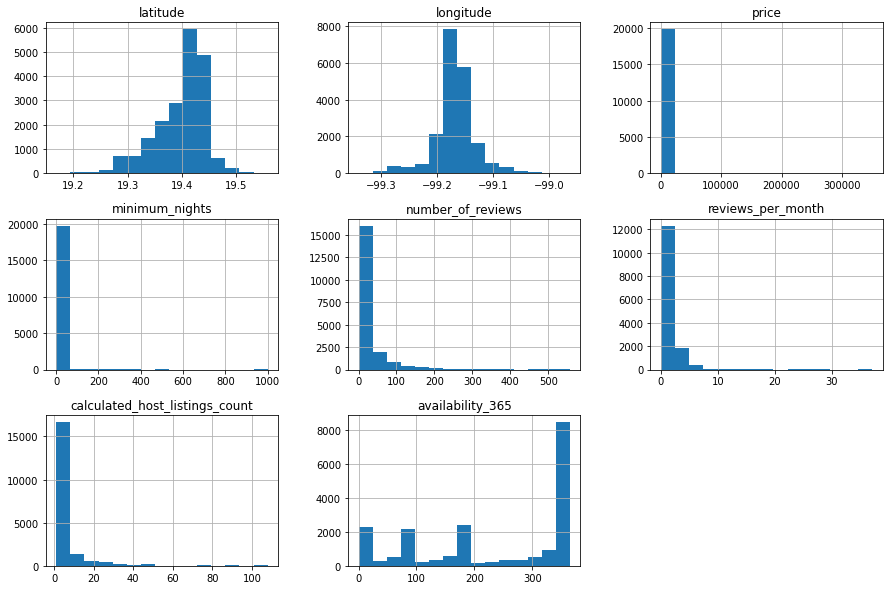

In [9]:
# Plotar histograma das variáveis
airbnb_df_copy.hist(bins = 15, figsize = (15,10));

## Questão 4: Há *outliers* presentes?

Ao analisar a distribuição do histograma, é possível verificar que há indícios da presença de outliers. Exemplos de variáveis com valores que divergem `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma ditribuição, aucasionando distorção na representação gráfica. Para confirmar tal distorção, há duas maneiras de detectar os outliers.

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [10]:
# Ver o resumo estatístico das variáveis numéricas
airbnb_df_copy[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19852.000000,19852.000000,19852.000000,14617.000000,19852.000000,19852.000000
mean,1150.711616,4.341981,23.587044,1.289220,6.099335,233.212422
std,4047.018248,20.391342,43.675959,1.560805,12.917520,135.551037
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,390.000000,1.000000,0.000000,0.270000,1.000000,90.000000
50%,679.000000,2.000000,5.000000,0.770000,2.000000,295.500000
75%,1185.000000,2.000000,27.000000,1.770000,5.000000,364.000000
max,350000.000000,1000.000000,557.000000,37.060000,108.000000,365.000000


Observando o resumo acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de R$1185, porém seu valor máximo é de R$350000
* A quantidade mínima de noites(`minimum_nights`) está acima de 365 dias no ano

## Boxplot para minimum_nights

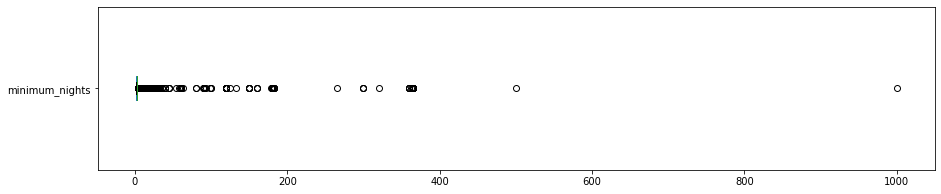

minimum_nights: Valores acima de 30 dias
198 entradas
0.9974%


In [12]:
# minimum_nights
airbnb_df_copy.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: Valores acima de 30 dias')
print('{} entradas'.format(len(airbnb_df_copy[airbnb_df_copy.minimum_nights > 30])))
print('{:.4f}%'.format((len(airbnb_df_copy[airbnb_df_copy.minimum_nights > 30]) / airbnb_df_copy.shape[0]) * 100))

## Boxplot para price

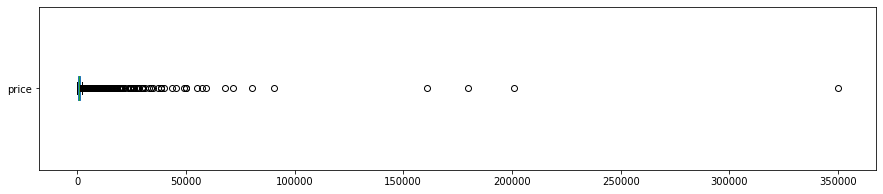


price: Valores acima de R$1500
3138 entradas
15.8070%


In [16]:
# price
airbnb_df_copy.price.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# Ver quantidade de valores acima de 1500 para price
print('\nprice: Valores acima de R$1500')
print('{} entradas'.format(len(airbnb_df_copy[airbnb_df_copy.price > 1500])))
print('{:.4f}%'.format((len(airbnb_df_copy[airbnb_df_copy.price > 1500]) / airbnb_df_copy.shape[0]) * 100))

Histogramas sem *outliers*

Já identificamos os *outliers* nas variáveis `minimum_nights` e `price`, vamos limpar o *DataFrame* delas e plotar os histogramas novamente.

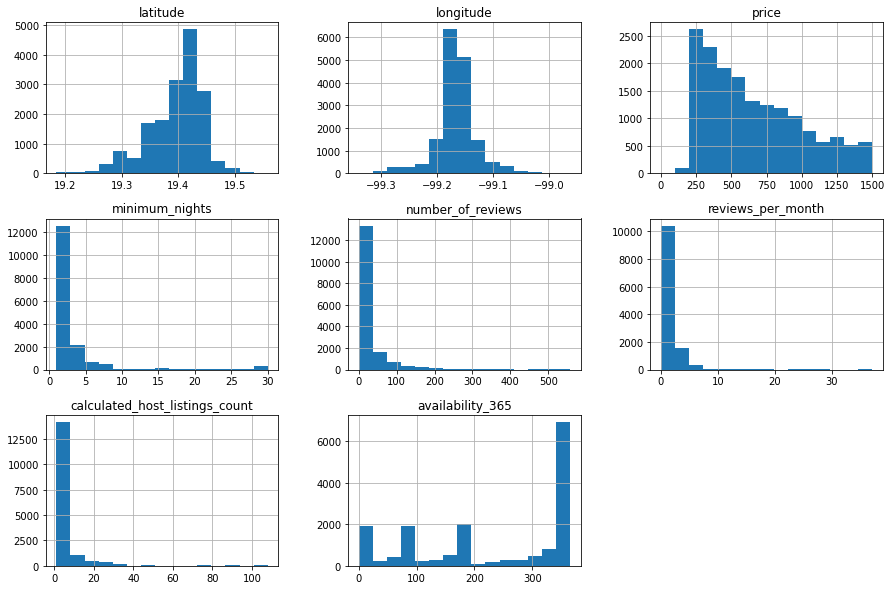

In [18]:
# Remover os outliers em um novo Dataframe
df_airbnb_clean = airbnb_df_copy.copy()
df_airbnb_clean.drop(df_airbnb_clean[df_airbnb_clean.price > 1500].index, axis = 0, inplace = True)
df_airbnb_clean.drop(df_airbnb_clean[df_airbnb_clean.minimum_nights > 30].index, axis = 0, inplace = True)

# Plotar os histogramas para as variáveis numéricas
df_airbnb_clean.hist(bins = 15, figsize = (15, 10));

## Questão 5: Qual a correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No contexto que estamos trabalhando, buscamos relação ou semelhança entre duas variáveis.

A relação pode ser medida em função do coeficiente de correlação estabelecendo qual a intensidade dela.

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [20]:
# Criar uma matriz de correlação
corr = df_airbnb_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.056074,0.114238,0.097829,0.091297,-0.002029
minimum_nights,-0.056074,1.000000,-0.082666,-0.127030,-0.076786,-0.017303
number_of_reviews,0.114238,-0.082666,1.000000,0.670861,0.061745,0.029749
reviews_per_month,0.097829,-0.127030,0.670861,1.000000,0.210043,0.041537
calculated_host_listings_count,0.091297,-0.076786,0.061745,0.210043,1.000000,0.122233
availability_365,-0.002029,-0.017303,0.029749,0.041537,0.122233,1.000000


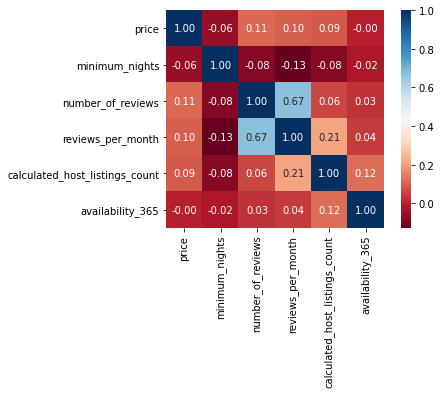

In [21]:
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

## Questão 6: Qual tipo de imóvel mais alugado no Airbnb?

A coluna da variável `roo_type` indica o tipo de locação que está anunciada no Airbnb. Sabe-se que na plataforma existe opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar as quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [22]:
# Mostrar a quantidade de cada tipo de imóvel disponível
df_airbnb_clean.room_type.value_counts()

Private room       8304
Entire home/apt    7762
Shared room         357
Hotel room          134
Name: room_type, dtype: int64

In [25]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
(df_airbnb_clean.room_type.value_counts() / df_airbnb_clean.shape[0]) * 100

Private room       50.154013
Entire home/apt    46.880474
Shared room         2.156188
Hotel room          0.809325
Name: room_type, dtype: float64

## Questão 7: Qual a localidade mais cara da Cidade do México?

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`, pois iremos agrupar valores que se repetem em um único valor e podemos realizar alguns métodos estatísticos, como média, contar quantas vezes se repetem.

Queremos comparar os bairro(*neighbourhoods*) a partir do preço de locação.

In [27]:
df_airbnb_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Cuajimalpa de Morelos     802.756545
Miguel Hidalgo            747.454230
Cuauhtémoc                715.413058
Álvaro Obregón            620.528416
Benito Juárez             601.881362
La Magdalena Contreras    584.070922
Coyoacán                  554.382823
Venustiano Carranza       522.569048
Azcapotzalco              496.629167
Gustavo A. Madero         485.602817
Name: price, dtype: float64

In [29]:
# Quantidade de imóveis no Cuajimalpa de Morelos
df_airbnb_clean[df_airbnb_clean.neighbourhood == 'Cuajimalpa de Morelos'].shape

(382, 11)

Iremos usar as latitudes e longitudes dos imóveis para plotar cada ponto.

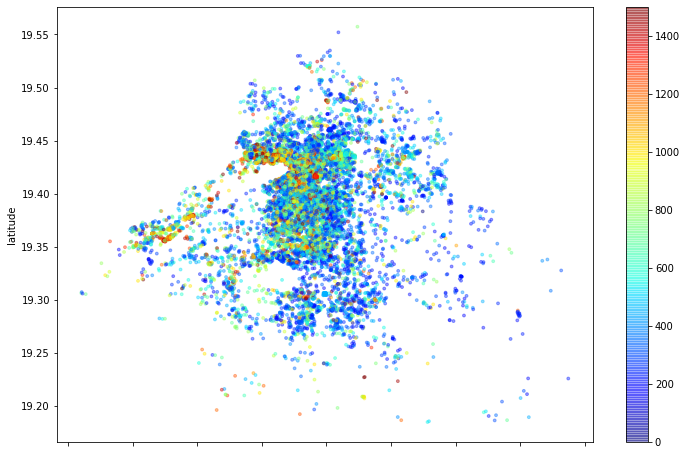

In [31]:
# Plotar os imóveis pela latitude-longitude
df_airbnb_clean.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, c = df_airbnb_clean['price'], s = 8,
                     cmap = plt.get_cmap('jet'), figsize = (12, 8));

## Conclusões

Foi realizada uma análise superficial na base de dados do Airbnb, mas pode-se observar que existem outliers em algumas variáveis.

Por fim, lembra-se que este dataset é uma versão resumida,ideal apenas para uma abordagem inicial.